In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Метод неопределенных коэффициентов

Необходимо найти полином вида
$$
f(x) = a_0 +  a_1x^1 + \dots + a_{n-1}x^{n-1} + a_nx^n,
$$
который проходит через заданное множество точек $(x_0,y_0)$, $(x_1,y_1)$, ...,$(x_n,y_n)$. Если степень полинома $n$, то точек $n+1$, такое же, как и количество коэффициентов в полиноме $a_0$, ..., $a_n$.

По заданным точкам  $(x_0,y_0)$, ...,$(x_n,y_n)$ нам необходимо определить $a_0$, ..., $a_n$.
Подставим каждую из точек в полином и получим систему линейных уравнений относительно неизвестных $a_0$, ..., $a_n$.
$$
\left\{
\begin{matrix}
a_0 +  a_1x_0^1 + \dots + a_{n-1}x_0^{n-1} + a_nx_0^n = y_0 \\
a_0 +  a_1x_1^1 + \dots + a_{n-1}x_1^{n-1} + a_nx_1^n  = y_1 \\
\vdots \\
a_0 +  a_1x_n^1 + \dots + a_{n-1}x_n^{n-1} + a_nx_n^n  = y_n \\
\end{matrix}
\right.
$$

Обращаем Ваше внимание, что в данной системе $x_i^j$ и $y_i$- конкретные известные нам числа, а неизвестными являются $a_i$.
В матричном виде данная система выглядит следующим образом:

$$
\begin{pmatrix}
1 & x_0^1 & \dots &  x_0^{n-1} &  x_0^n \\
1 & x_1^1 & \dots &  x_1^{n-1} &  x_1^n \\
\vdots \\
1 & x_n^1 & \dots &  x_n^{n-1} &  x_n^n \\
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_{n} \\
\end{pmatrix}
=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{n} \\
\end{pmatrix}
$$

Далее это матричное уравнение можно решить и получить значения $a_0$, ..., $a_n$.

### При n = 1 (прямая) ###

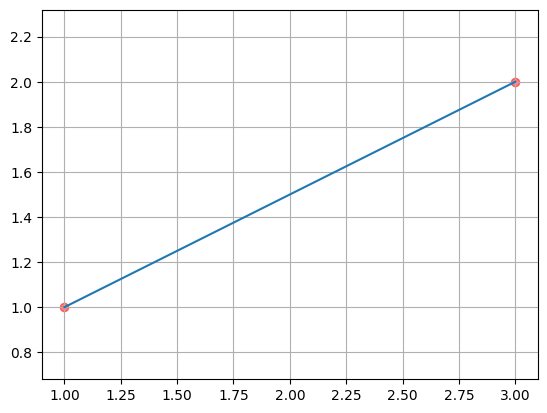

In [ ]:
# Рассматриваем две точки
# A = (1,1) и B = (3,2)
X = np.array([1,3])
Y = np.array([1,2])

R = np.array([
    [1,  X[0]],
    [1,  X[1]],
])
A = np.linalg.solve(R,Y)

linsp  = np.linspace(X.min(), X.max())   # Множество значений от X.min() до X.max() (с шагом 50 по умолчанию)
f = np.poly1d(np.flip(A)) # Создаем поллином при помощи встроенной функции np.poly1d
fun = [f(x) for x in linsp] # Создаем точки для построения графика

plt.plot(linsp,fun); # Рисуем график
plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.axis('equal') # Делаем одинаковые оси
plt.grid(True) # Рисуем сетку

### При n = 2 (парабола) ###

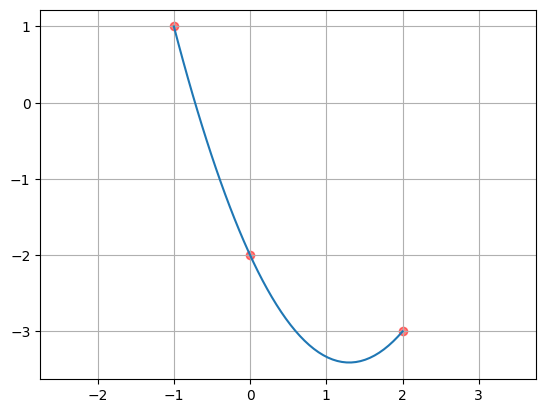

In [ ]:
# Рассматриваем три  точки
# A = (-1,1), B = (0,-2) и C = (2,-3)
X = np.array([-1,0,2])
Y = np.array([1,-2,-3])

def get_function_2(X, Y):
    R = np.array([
        [1,  X[0], pow(X[0],2)],
        [1,  X[1], pow(X[1],2)],
        [1,  X[2], pow(X[2],2)],
    ])
    A = np.linalg.solve(R,Y)

    linsp  = np.linspace(X.min(), X.max())   # Множество значений от X.min() до X.max() (с шагом 50 по умолчанию)
    f = np.poly1d(np.flip(A)) # Создаем поллином при помощи встроенной функции np.poly1d
    fun = [f(x) for x in linsp] # Создаем точки для построения графика
    return linsp, fun

linsp, fun = get_function_2(X, Y)

plt.plot(linsp,fun); # Рисуем график
plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.axis('equal') # Делаем одинаковые оси
plt.grid(True) # Рисуем сетку

# Задания

Далее идут 5 заданий:

* 3 балла ставится за 4 задания.
* 2 балла ставится за 3 задания.
* 1 балл ставится за 2 задание.

Бонусная оценка 5 ставится за решенное 5 задание.

### Задание 1 ###
Реализуйте метод для 5 точек.

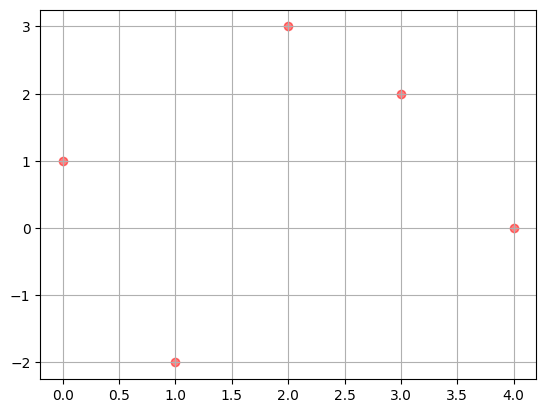

In [ ]:
# Рассматриваем пять точек
X = np.array([0, 1, 2, 3, 4])
Y = np.array([1,-2, 3, 2, 0])



plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.grid(True)

### Задание 2 ###
Реализуйте метод для $n$ точек.

Основная сложность заключается в создании матрицы $R$.

/usr/local/lib/python3.9/dist-packages/numpy/lib/polynomial.py:779: RuntimeWarning: invalid value encountered in double_scalars
  y = y * x + pv


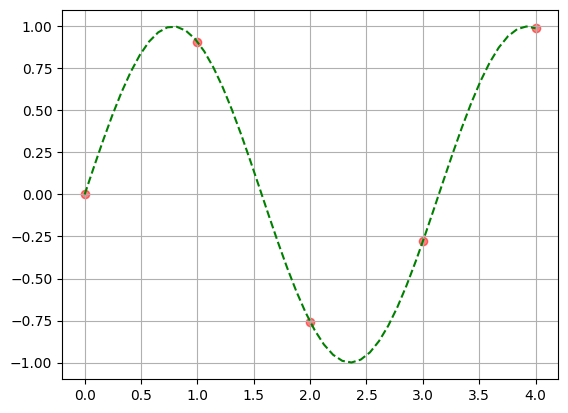

In [ ]:
n = 5
X = np.arange(n)
Y = np.sin(2*X)

R = np.empty((n, n))
# Тут надо правильно заполнить матрицу элементами

A = np.linalg.solve(R, Y)
linsp  = np.linspace(X.min(), X.max())
f = np.poly1d(np.flip(A))
fun = [f(x) for x in linsp]
plt.plot(linsp,fun);
plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.plot(linsp,np.sin(2*linsp),'g--');
plt.grid(True)

# Приближение на отрезках

Видно, что при больших степенях полином ведет себя "не очень хорошо", особено при граничных точках.

Давайте попробуем решить задачу для 11 точек используя только полиномы 2 степени.

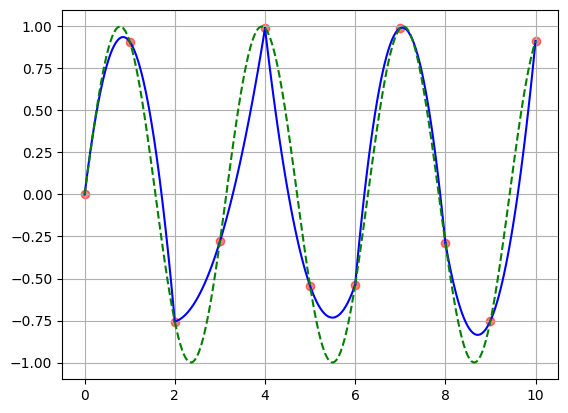

In [ ]:
n = 11
X = np.arange(n)
Y = np.sin(2*X)

linsp, fun = get_function_2(X[0:3], Y[0:3]) # для точек с индексами 0,1,2
plt.plot(linsp,fun,'b');
plt.plot(linsp,np.sin(2*linsp),'g--');

linsp, fun = get_function_2(X[2:5], Y[2:5]) # для точек с индексами 2,3,4
plt.plot(linsp,fun,'b');
plt.plot(linsp,np.sin(2*linsp),'g--');

linsp, fun = get_function_2(X[4:7], Y[4:7]) # для точек с индексами 4,5,6
plt.plot(linsp,fun,'b');
plt.plot(linsp,np.sin(2*linsp),'g--');

linsp, fun = get_function_2(X[6:9], Y[6:9]) # для точек с индексами 6,7,8
plt.plot(linsp,fun,'b');
plt.plot(linsp,np.sin(2*linsp),'g--');

linsp, fun = get_function_2(X[8:11], Y[8:11]) # для точек с индексами 8,9,10
plt.plot(linsp,fun,'b');
plt.plot(linsp,np.sin(2*linsp),'g--');

plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.grid(True)

### Задание 3 ###
Реализуйте предыдущий метод для любого нечетного числа точек.

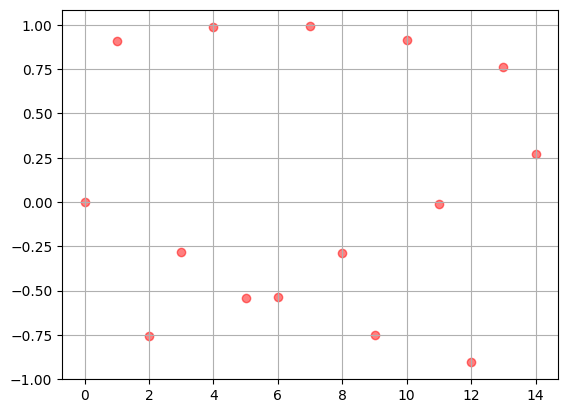

In [ ]:
n = 15
X = np.arange(n)
Y = np.sin(2*X)

plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.grid(True)

# Квадратичные сплайны

Рассмотрим 4 точки: $A_0 = (x_0, y_0), A_1 = (x_1, y_1), A_2 = (x_2, y_2)$ и $A_3 = (x_3, y_3)$

Также определим координату $t = \frac{x_1 + x_2}{2}$.

Найдем два полинома второй степени:
$$ f(x) = a_0 + a_1x + a_2x^2$$

$$ g(x) = b_0 + b_1x + b_2x^2$$

со следующими свойствами:

1. Полином $f(x)$ проходит через точки  $A_0$ и $A_1$, т.е. $f(x_0) = y_0$ и $f(x_1) = y_1$.

2. Полином $g(x)$ проходит через точки  $A_2$ и $A_3$, т.е. $g(x_2) = y_2$ и $g(x_3) = y_3$.

3. Полиномы $f(x)$ и $g(x)$ "стыкуются" в точке $t$, т.е. $f(t) = g(t)$ и $f'(t) = g'(t)$.

В данной формулировке понятие "стыковки" нестрого. По смыслу оно означает, что один полином плавно переходит в другой. Не образуется угла в точке перехода, как это было в предыдущих примерах.

$f'(t)$ - означает производную $f(t)$ в точке $t$. Равенство $f'(t) = g'(t)$ означает что у функций $f(t)$  и $g(t)$ одинаковые касательные в точке $t$. Благодаря этому и обеспечивается плавность перехода.

В нашем курсе не рассматриваем понятие производной. Просто примем тот факт, то производная в точке к функции -- это угловой коэффициент касательной к функции в данной точке.

Производные квадратичного полинома вычисляются следующим образом:

$$ f'(x) = a_1 + 2a_2x$$

$$ g'(x) = b_1 + 2b_2x$$

В результате мы имеем следующую систему линейных уравнений:

$$
\left\{
\begin{matrix}
a_0 +  a_1x_0 + a_2x_0^2 = y_0 \\
a_0 +  a_1x_1 + a_2x_1^2 = y_1 \\
b_0 +  b_1x_3 + b_2x_3^2 = y_2 \\
b_0 +  b_1x_4 + b_2x_4^2 = y_3 \\
a_0 +  a_1t + a_2t^2 - (b_0 +  b_1t + b_2t^2) = 0 \\
a_1 + 2a_2t - (b_1 + 2b_2t) = 0\\
\end{matrix}
\right.
$$

Перепишем в матричном виде:

$$
\begin{pmatrix}
1 & x_0 & x_0^2 & 0 & 0 & 0  \\
1 & x_1 & x_1^2 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & x_2 & x_2^2 & \\
0 & 0 & 0 & 1 & x_3 & x_3^2 & \\
1 & t & t^2 & -1 & -t & -t^2  \\
0 & 1 & 2t & 0 & -1 & -2t  \\
\end{pmatrix}
\begin{pmatrix}
a_1 \\
a_2 \\
a_3 \\
b_1 \\
b_2 \\
b_3 \\
\end{pmatrix}
=
\begin{pmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
0 \\
0 \\
\end{pmatrix}
$$

В результате мы получили матричное уравнение.

Пододный подход к построению фукнций из кусков квадратичных полиномов с "гладкой" склейкой назвается построением при помощи __квадратичных сплайнов__.

Напишем код, который его решает и строит соответствующие графики.

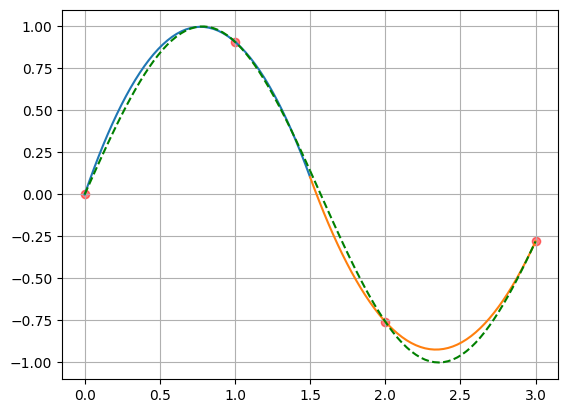

In [ ]:
n = 4
X = np.arange(n)
Y = np.sin(2*X)

T = (X[1] + X[2]) / 2
R = np.array([
    [ 1, X[0],X[0]**2, 0, 0, 0],
    [1, X[1], X[1]**2, 0, 0, 0],
    [0, 0, 0, 1, X[2], X[2]**2],
    [0, 0, 0, 1, X[3], X[3]**2],
    [1, T, T**2, -1, -T, -T**2],
    [0, 1, 2*T, 0, -1, -2*T],
    ])

Z = np.hstack([Y,[0,0]])

A = np.linalg.solve(R, Z)

linsp  = np.linspace(X.min(), T)
f = np.poly1d(np.flip(A[0:3]))
fun = [f(x) for x in linsp]
plt.plot(linsp,fun);
plt.plot(linsp,np.sin(2*linsp),'g--');

linsp  = np.linspace(T, X.max())
f = np.poly1d(np.flip(A[3:]))
fun = [f(x) for x in linsp]
plt.plot(linsp,fun);
plt.plot(linsp,np.sin(2*linsp),'g--');

plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.grid(True)


### Задание 4 ###
Реализуйте предыдущий метод для 5 точек $A_0=(x_0, y_0), A_1=(x_1, y_1), A_2=(x_2, y_2), A_3=(x_3, y_3)$ и $A_4=(x_4, y_4)$.

Вам потребуется построить 3 квадратичные параболы: $f_1(x)$,  $f_2(x)$ и $f_3(x)$.

$f_1(x)$ пройдет через точки $A_0$ и $A_1$ и должна состыковаться с $f_2(x)$ в точке $t_1 = \frac{(x_1+x_2)}{2}$.

$f_2(x)$ пройдет через точку $A_2$, должна состыковаться с $f_1(x)$ в точке $t_1 = \frac{(x_1+x_2)}{2}$ и должна состыковаться с $f_3(x)$ в точке $t_2 = \frac{(x_2+x_3)}{2}$

$f_3(x)$ пройдет через точки $A_3$ и $A_4$ и должна состыковаться с $f_2(x)$ в точке $t_2 = \frac{(x_2+x_3)}{2}$.

В результате у Вас должна получиться система из 9 уравнений (5 уравнений прохождения парабол через заданные точки и по 2 уравнения дает каждое условие стыковки) с 9 неизвестными (3 параболы, по 3 коэффициента в каждой).



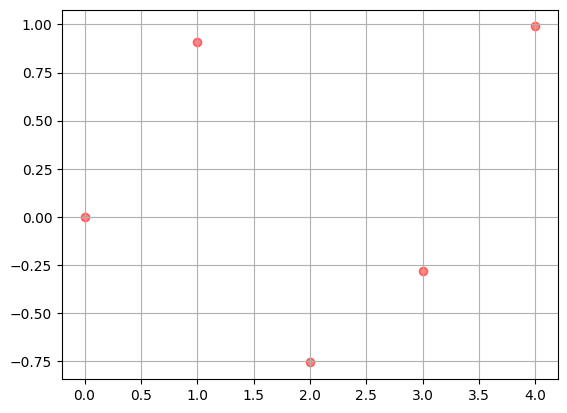

In [ ]:
n = 5
X = np.arange(n)
Y = np.sin(2*X)

T1 = (X[1] + X[2]) / 2
T2 = (X[2] + X[3]) / 2

plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.grid(True)

### Задание 5 (повышенной сложности -- бонусная оценка) ###

Реализуйте предыдущий метод для произвольного числа точек.

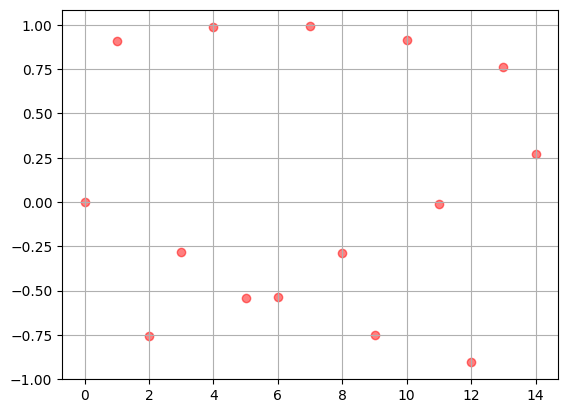

In [ ]:
n = 15
X = np.arange(n)
Y = np.sin(2*X)

plt.scatter(X,Y, color='r', alpha=0.5); # Рисуем исходные точки
plt.grid(True)